# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [125]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
sns.set()

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [101]:
data.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

In [5]:
w = data[data.race=='w']
b = data[data.race=='b']

In [100]:
pw = len(w[w.call==1])/len(w)
pb = len(b[b.call==1])/len(b)

print('Percent of white-sounding names that receive callbacks: ',round(pw,3))
print('Percent of black-sounding names that receive callbacks: ',round(pb,3))

Percent of white-sounding names that receive callbacks:  0.097
Percent of black-sounding names that receive callbacks:  0.064


## 1. What test is appropriate for this problem? Does CLT apply?

In [8]:
w.shape

(2435, 65)

In [10]:
b.shape

(2435, 65)

[Text(0,0.5,'Frequency'), Text(0.5,0,'Bernoulli (callbacks)')]

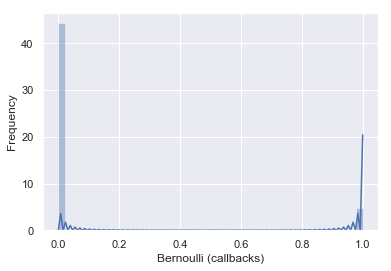

In [16]:
#Bernoulli Distribuuton for white-sounding names callbacks

n_data = len(w['call'])
n_bins = int(np.sqrt(n_data))
ax = sns.distplot(w['call'], kde=True)
ax.set(xlabel='Bernoulli (callbacks)',ylabel='Frequency')

Because each subset of the original dataframe (w and b) have over 30 observations, the z test is appropriate to use.  The Central Limit Theorem does apply as n (2,435 observations in each dataset) is sufficiently large. 

## 2. What are the null and alternate hypotheses?

### H0: The proportion of callbacks for white-sounding names on resumes is equal to the proportion of callbacks for black-sounding names.  There is no racial discrimination in the labor market.

### H1: The proportion of callbacks for white-sounding names on resumes is different than the proportion of callbacks for black-sounding names.  There is racial discrimination evident in the labor market.

In [7]:
# Your solution to Q3 here

## 3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

### Bootstrap Approach

In [110]:
wc = w['call']
bc = b['call']

In [116]:
# Difference of means
diff = np.mean(wc) - np.mean(bc)

permutation_replicates = np.empty(10000)

for i in range(len(permutation_replicates)):
    
    permutation_samples = np.random.permutation(np.concatenate((wc,bc)))
    
    white_perm = permutation_samples[:len(wc)]
    black_perm = permutation_samples[len(wc):]
    
    permutation_replicates[i] = np.abs(np.mean(white_perm)-np.mean(black_perm))

p = np.sum((permutation_replicates > diff)/len(permutation_replicates))

In [117]:
p

0.0

### Frequentist Approach

In [141]:
#Difference in proportions
prop_diff = pw - pb


#z-statistic
count = np.array([np.sum(wc),np.sum(bc)])
nobs = np.array([len(wc),len(bc)])
stat, pval = proportions_ztest(count, nobs)

# Standard Error - SEp = sqrt [ p(1 - p) / n ]
se = np.sqrt((pw*(1-pw))/len(wc)+(pb*(1-pb))/len(bc))

# Margin of Error
moe = 1.96  * se

# 95% Confidence Interval
c_int = prop_diff + (np.array([-1, 1]) * moe)
 

In [142]:
print('Difference in percentage of callbacks: ', prop_diff)
print('Standard Error: ',se)
print('Margin of Error: ',moe)
print('95% Confidence Interval: ',c_int)
print('P-Value: ',pval)

Difference in percentage of callbacks:  0.032032854209445585
Standard Error:  0.0077833705866767544
Margin of Error:  0.015255406349886438
95% Confidence Interval:  [0.01677745 0.04728826]
P-Value:  3.983886837585077e-05


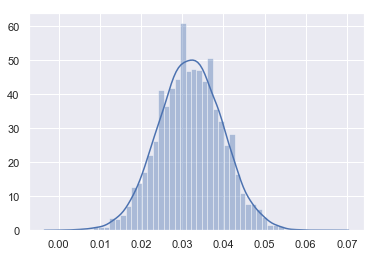

In [85]:
sns.distplot(bs_replicates)

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

## 4. Write a story describing the statistical significance in the context of the original problem.

According to the dataset, 9.7% of the resumes with white-sounding names received a call back, while 6.4% of resumes
with black-sounding names received a call back.  This proportion difference of 3.3% might imply an overall mean difference between black- and white-sounding names on resumes receiving callbacks.

To test whether this difference is statistically significant, we used an alpha of 0.05.  Assuming there is no proportion difference, we want to know how likely it is to receive a difference of around 3%.  Using a bootstrapping approach, we obtained a p-value of 0.0, indicating that it is extremely unlikely to get this 3% difference if there truly was no proportionate difference between two kinds of resumes receiving calls. Because of this p-value, we reject the null hypothesis and can conclude the difference observed is statistically significant.

## 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

The analysis does not confirm whether race/name is the most important factor in callback success, nor does it rank this factor among the others in terms of influence.  Rather, the tests performed simply show that there is evidence of a significant difference between people with white-sounding names who receive callbacks and people with black-sounding names.

There are plenty of other factors to consider when analyzing influences over employer callbacks.  For example, education, years of experience, the kind of experience (i.e. retail, managerial roles, etc), and even sex can all play a part in whether an employer calls back an applicant.  Further analysis is needed to gauge whether these factors play a statistically significant role in callbacks.